In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data

In [2]:
x_train = np.arange(-2*np.pi, 2*np.pi, 0.01).reshape((-1, 1))
y_train = np.cos(x_train).reshape((-1, 1))

x_test = np.arange(-4*np.pi, 4*np.pi, 0.01).reshape((-1, 1))
y_test = np.cos(x_test).reshape((-1, 1))

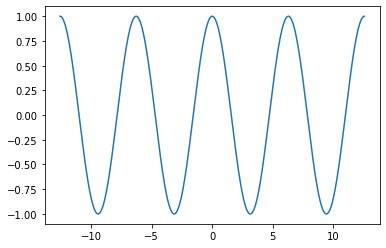

In [3]:
plt.plot(x_test, y_test)

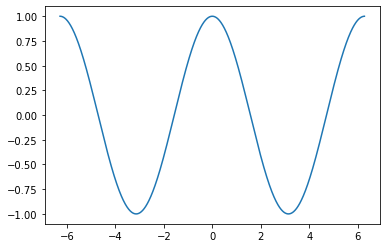

In [4]:
plt.plot(x_train, y_train)

## Model

In [5]:
from utils import MSE
from layers import SigmoidLayer, FullyConnectedLayer
from models import Perceptron

## Without L2 and Adam

In [6]:
hidden_size = 30
model = Perceptron(loss = MSE())

model.add_layer(FullyConnectedLayer(1, hidden_size))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(hidden_size, hidden_size))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(hidden_size, 10))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(10, 1))
model.add_layer(SigmoidLayer())

loss, best_weights = model.fit(x_train, y_train, 1e-3, num_epochs=15000)

0 Loss:  3138478.7515318077
250 Loss:  135314.1701365257
500 Loss:  150707.84679988888
750 Loss:  148156.205784431
1000 Loss:  123420.65248991484
1250 Loss:  94550.13303226841
1500 Loss:  66982.39550566523
1750 Loss:  45739.36953546289
2000 Loss:  31283.62339319051
2250 Loss:  22034.028060638513
2500 Loss:  16269.411581898958
2750 Loss:  12688.761806497992
3000 Loss:  10431.492632574833
3250 Loss:  8954.144529704741
3500 Loss:  7921.169373971582
3750 Loss:  7133.567311699718
4000 Loss:  6481.237100513331
4250 Loss:  5908.573611728503
4500 Loss:  5390.416616746255
4750 Loss:  4916.8644385704265
5000 Loss:  4484.603580876843
5250 Loss:  4092.392752123973
5500 Loss:  3738.993453954006
5750 Loss:  3422.458045715872
6000 Loss:  3140.0984682756903
6250 Loss:  2888.729469612299
6500 Loss:  2664.964700739735
6750 Loss:  2465.464422491326
7000 Loss:  2287.1037616198882
7250 Loss:  2127.0653960023647
7500 Loss:  1982.8739895887463
7750 Loss:  1852.391804955004
8000 Loss:  1733.792039694433
8250 

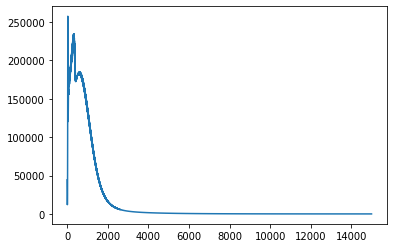

In [7]:
plt.plot(loss[10:])

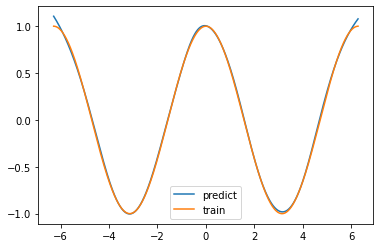

In [8]:
model.upload_weights(best_weights)

plt.plot(x_train, model.forward(x_train), label='predict')
plt.plot(x_train, y_train, label='train')
plt.legend()

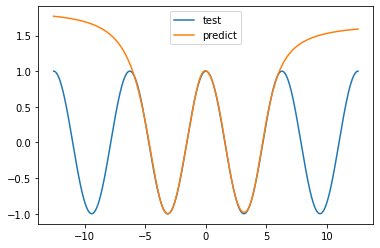

In [9]:
plt.plot(x_test, y_test, label='test')
plt.plot(x_test, model.forward(x_test), label='predict')
plt.legend()

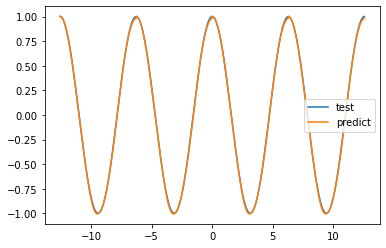

In [10]:
plt.plot(x_test, y_test, label='test')
plt.plot(x_test, -model.forward(x_test % (2*np.pi)-np.pi), label='predict')
plt.legend()

## With Adam

In [21]:
from optimizers import Adam

hidden_size = 30
model = Perceptron(loss = MSE)

model.add_layer(FullyConnectedLayer(1, hidden_size))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(hidden_size, hidden_size))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(hidden_size, 10))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(10, 1))


loss, best_weights = model.fit(x_train, y_train, 1e-3, optimizer=Adam(model), num_epochs=1500)

0 Loss:  1067444.4278627129
250 Loss:  161.93345389662812
500 Loss:  55.852572324843955
750 Loss:  28.2812527519693
1000 Loss:  4.2445014756495985
1250 Loss:  2.633858769291995


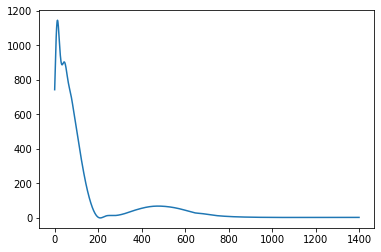

In [22]:
plt.plot(loss[100:])

In [23]:
model.upload_weights(best_weights)

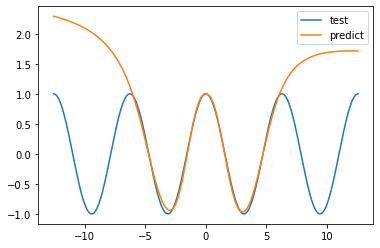

In [24]:
plt.plot(x_test, y_test, label='test')
plt.plot(x_test, model.forward(x_test), label='predict')
plt.legend()

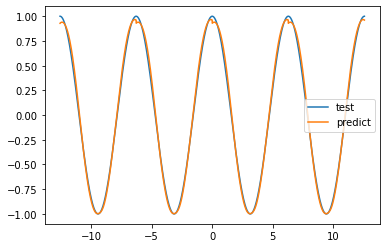

In [25]:
plt.plot(x_test, y_test, label='test')
plt.plot(x_test, -model.forward(x_test % (2*np.pi)-np.pi), label='predict')
plt.legend()

## With L2 and Adam

In [26]:
from optimizers import L2

hidden_size = 30
model = Perceptron(loss = MSE)

model.add_layer(FullyConnectedLayer(1, hidden_size))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(hidden_size, hidden_size))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(hidden_size, 10))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(10, 1))
model.add_layer(SigmoidLayer())


loss, best_weights = model.fit(x_train, y_train, 1e-3, reg=L2(0.0001), optimizer=Adam(model), num_epochs=5000)

0 Loss:  670968.1175201581
250 Loss:  49.295133046579124
500 Loss:  7.779017785839731
750 Loss:  40.66584763914673
1000 Loss:  0.09847860506540054
1250 Loss:  32.223420228586754
1500 Loss:  0.8786044632602534
1750 Loss:  0.6668816981405405
2000 Loss:  13.549729505339227
2250 Loss:  3.6226834461799693
2500 Loss:  3.298026577020225
2750 Loss:  14.470295812561565
3000 Loss:  0.38039415144763683
3250 Loss:  1.6979205192585192
3500 Loss:  0.14392299296689967
3750 Loss:  3.0563449348585516
4000 Loss:  20.314155021070572
4250 Loss:  16.083381837138884
4500 Loss:  0.7188506366090937
4750 Loss:  128.35393176689033


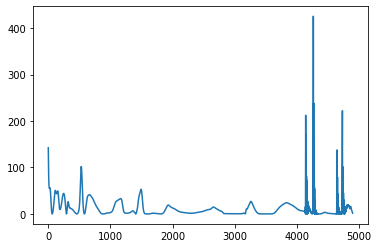

In [27]:
plt.plot(loss[100:])

In [28]:
model.upload_weights(best_weights)

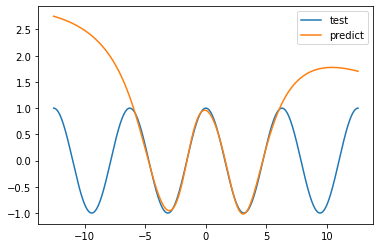

In [29]:
plt.plot(x_test, y_test, label='test')
plt.plot(x_test, model.forward(x_test), label='predict')
plt.legend()

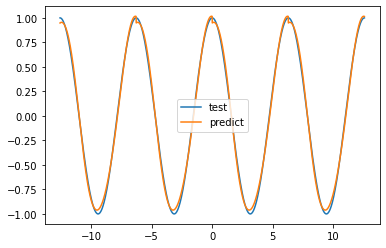

In [30]:
plt.plot(x_test, y_test, label='test')
plt.plot(x_test, -model.forward(x_test % (2*np.pi)-np.pi), label='predict')
plt.legend()